In [1]:
from test import *
from sklearn.feature_extraction.text import CountVectorizer
import lda
import matplotlib.pyplot as plt
%matplotlib inline
import cPickle as pickle
import re
from bs4 import BeautifulSoup
import time
import random

In [2]:
# %time articles, title_list, urls = get_text('http://arxiv.org/list/math.AT/1508?show=200')
# with open("AT.pkl", 'w') as f:
#     pickle.dump(articles, f)
# len(articles)

CPU times: user 231 ms, sys: 50.1 ms, total: 281 ms
Wall time: 14min 22s


48

In [4]:
#%%time 
#url = 'http://arxiv.org/list/math.NT/1508?show=200'
#M, topics, text, title_list, urls = get_topics(url,10)
#best_titles, best_scores = get_best_titles(M, 3, 5, title_list)
#print "The ten most prevalent topics in the corpus are:"
#for i in range(len(topics)):
#    print topics[i]
#    print '\n'
    
#for i in range(len(best_titles)):
#    print best_titles[i]
#    print "Score: ", best_scores[i]

In [36]:
countvec = CountVectorizer(decode_error='ignore', stop_words='english', max_features=5000)
CV = countvec.fit_transform(text)
vocab=tuple(countvec.vocabulary_)
lda_model = lda.LDA(n_topics=10, n_iter=1500)
lda_model.fit(CV)

<lda.lda.LDA instance at 0x112bf7998>

In [37]:
topic_word = lda_model.topic_word_  # model.components_ also works
n_top_words = 8
topic_words = []
for i, topic_dist in enumerate(topic_word):
    topic_words.append(np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1])
    
for i in range(len(topic_words)):
    print ' '.join(topic_words[i])
    print '\n'

discretized minimal angles residue correction short eigencurve


realization autre hd details calculations 4π residue


debrecen stange american discretized commutative kenneth strings


publishing decimal setup et projected discuss department


commutative quotients cyclic discretized residue supposed diﬀerential


shparlinski schanuel physics complexes proposed dihua compactiﬁcation


sage equations lapkova obtient decompose supposons gray


residue discretized coprimality asserts eigencurve 2ω mapping


acknowledgement residue stange matthew long dihua summing


multi provide residue iℓ triangles conjectural discretized




In [38]:
doc_topic = lda_model.doc_topic_
topic_most_pr = []
for n in range(10):
    topic_most_pr.append(doc_topic[n].argmax())

for n in range(10):
    print "doc: {} topic: {}".format(n, str(topic_words[topic_most_pr[n]]))

doc: 0 topic: [u'multi' u'provide' u'residue' u'i\u2113' u'triangles' u'conjectural'
 u'discretized']
doc: 1 topic: [u'acknowledgement' u'residue' u'stange' u'matthew' u'long' u'dihua'
 u'summing']
doc: 2 topic: [u'publishing' u'decimal' u'setup' u'et' u'projected' u'discuss'
 u'department']
doc: 3 topic: [u'commutative' u'quotients' u'cyclic' u'discretized' u'residue'
 u'supposed' u'di\ufb00erential']
doc: 4 topic: [u'debrecen' u'stange' u'american' u'discretized' u'commutative' u'kenneth'
 u'strings']
doc: 5 topic: [u'realization' u'autre' u'hd' u'details' u'calculations' u'4\u03c0'
 u'residue']
doc: 6 topic: [u'debrecen' u'stange' u'american' u'discretized' u'commutative' u'kenneth'
 u'strings']
doc: 7 topic: [u'residue' u'discretized' u'coprimality' u'asserts' u'eigencurve'
 u'2\u03c9' u'mapping']
doc: 8 topic: [u'acknowledgement' u'residue' u'stange' u'matthew' u'long' u'dihua'
 u'summing']
doc: 9 topic: [u'residue' u'discretized' u'coprimality' u'asserts' u'eigencurve'
 u'2\u03c9

In [39]:
topic_most_pr

[9, 8, 3, 4, 2, 1, 2, 7, 8, 7]

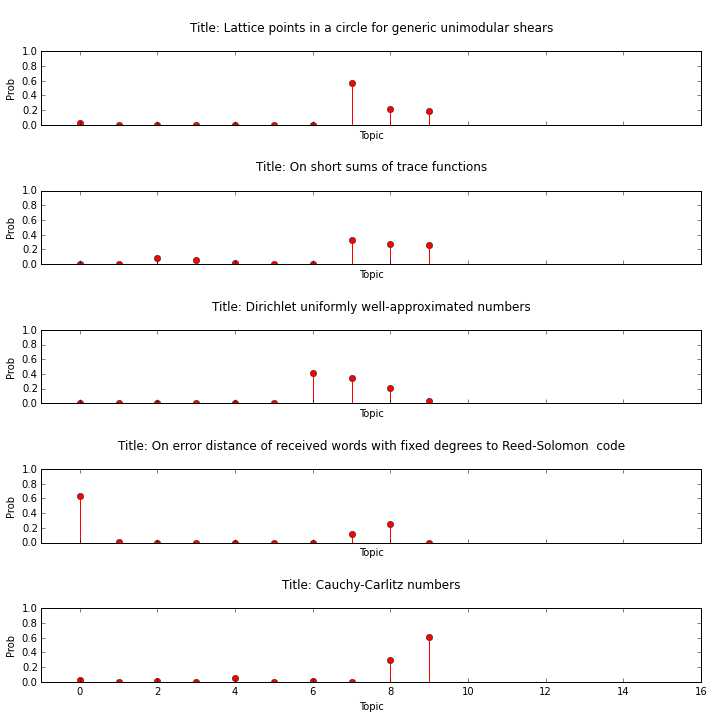

In [40]:
f, ax= plt.subplots(5, 1, figsize=(10, 10), sharex=True)
for i, k in enumerate([9,10,12,50,32]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 16)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_xlabel('Topic')
    ax[i].set_title("{}".format(title_list[k]))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

In [2]:
categories = ['AG', 'AT', 'AP', 'CT']
urls = []
for cat in categories:
    urls.append('http://arxiv.org/list/math.{0}/1508?show=10'.format(cat))

In [2]:
r = requests.get('http://lanl.arxiv.org/archive/math', headers={'User-agent': 'Mozilla/5.0'})
soup = BeautifulSoup(r.text, 'html.parser')
print r.status_code
match_math = re.findall(r'math\.\w\w', soup.text)
match_math = list(set(match_math))
print len(match_math)
print match_math

200
32
[u'math.NA', u'math.DG', u'math.HO', u'math.FA', u'math.DS', u'math.PR', u'math.LO', u'math.RA', u'math.NT', u'math.GR', u'math.CO', u'math.AG', u'math.GT', u'math.AC', u'math.IT', u'math.CA', u'math.AT', u'math.AP', u'math.CV', u'math.RT', u'math.CT', u'math.GN', u'math.GM', u'math.MG', u'math.OC', u'math.ST', u'math.OA', u'math.SP', u'math.MP', u'math.KT', u'math.QA', u'math.SG']


In [4]:
#'http://arxiv.org/list/math.AG/1508?show=250'

front = 'http://lanl.arxiv.org/list/'
end = '/1508?show=250'
math_urls = [front+x+end for x in match_math]
math_tags = [x[-2:] for x in match_math]
math_names = ['math_'+ x + '.pkl' for x in math_tags]
print math_names[0]
print math_urls[2]

math_NA.pkl
http://lanl.arxiv.org/list/math.HO/1508?show=250


In [5]:
#%%time 
#for url, name in zip(math_urls, math_names):
#    stuff = get_text(url)
#    with open(name, 'w') as f:
#        pickle.dump(stuff, f)

In [4]:
math_urls[5]

u'http://lanl.arxiv.org/list/math.PR/1508?show=250'

In [20]:
def get2_text(url):
    '''Input a URL from the arxiv (page of a list of papers), return a list of
    parsed articles (list of strings)
    '''

    #session = requesocks.session()

# #Use Tor for both HTTP and HTTPS
    #session.proxies = {'http': 'socks5://127.0.0.1:9150', 'https': 'socks5://127.0.0.1:9150'}


#http://lanl.arxiv.org/pdf/1508.00039.pdf

    base_url = url
    r = requests.get(base_url, headers={'User-agent': 'Mozilla/5.0'})
    #print r.status_code
    #r = session.get(base_url, headers={'User-agent': 'Mozilla/5.0'})
    print r.status_code

    soup = BeautifulSoup(r.text, 'html.parser')
    pdfs = soup.findAll(title = 'Download PDF')
    links = [str(pdf).split()[1].strip('href="') for pdf in pdfs]
    urls = ['http://lanl.arxiv.org'+ link for link in links]
    titles = soup.findAll(class_="list-title")
    title_list = []
    articles = []
    #pool = multiprocessing.Pool(processes=4)
    #articles = pool.map(parsePDF, urls)
    
    ix = 0
    failed = []
    while ix < len(urls): 
        print ix
        try: 
            articles.append(parsePDF(urls[ix]))
            title_list.append(titles[ix].text)
            print "Articles: ", len(articles)
            print "Titles: ", len(title_list)
            time.sleep(random.randint(0,30))
            ix += 1
            
        except:
            print 'unexpected error'
            failed.append((urls[ix], ix))
            ix += 1
    print 'num failed:', len(failed)
    
    print 'Num articles: ', len(articles)
    
    if len(failed):
        jx = 0
        for pair in failed: 
            try: 
                articles.append(parsePDF(pair[0]))
                title_list.append(titles[pair[1]].text)
                print "articles: ", len(articles)
                print "titles: ", len(title_list)
                time.sleep(random.randint(0,30))
                jx += 1
            except:
                print 'unexpected error'
                jx += 1
    print 'Num articles: ', len(articles)
            
#    titles = soup.findAll(class_="list-title")
#    title_list = []
#    for ix in range(len(titles)):
#        title_list.append(titles[ix].text)
    print r.status_code
    return articles, title_list, urls
    #return title_list, urls, links, pdfs

In [22]:
# math_urls = math_urls[5:]
# math_names = math_names[5:]
# print len(math_urls)
# print len(math_names)

# math_names = math_names[0:-1]
# print len(math_names)

# math_urls = math_urls[0:-1]
# print len(math_urls)

In [23]:
math_names[0]

u'math_PR.pkl'

In [ ]:
%%time 
stuff = get2_text(math_urls[0])
with open(math_names[0], 'w') as f:
    pickle.dump(stuff, f)
#print "sleep"
#time.sleep(30)

200
0
Articles: 

In [19]:
random.randint(0,30)

13

In [5]:
t = ('x', 'y', 'z')

In [6]:
type(t)

tuple

In [7]:
len(t)

3

In [8]:
r = (t,'u')

In [9]:
type(r)

tuple

In [10]:
len(r)

2

In [12]:
r

(('x', 'y', 'z'), 'u')

In [16]:
t.index('x')

0

In [22]:
t += ('b',)

In [24]:
len(t)

4

In [25]:
L = [('a', 'b', 'c'), ('x', 'y', 'z'), ('s', 'd', 'f')]

In [26]:
L

[('a', 'b', 'c'), ('x', 'y', 'z'), ('s', 'd', 'f')]

In [27]:
T = [x+('NT',) for x in L]

In [28]:
T

[('a', 'b', 'c', 'NT'), ('x', 'y', 'z', 'NT'), ('s', 'd', 'f', 'NT')]